<br> <font color=blue> <font size=6><b>Random Forest:  </b>

<b> <font color='red' size=5> Business Problem:  </b> <br>
    <b>A cloth manufacturing company is interested to know about the segment or attributes causes high sale </b>

Company Data: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Company_Data.csv")

In [3]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [7]:
df.describe().T

count        mean         std   min     25%     50%     75%  \
Sales        400.0    7.496325    2.824115   0.0    5.39    7.49    9.32   
CompPrice    400.0  124.975000   15.334512  77.0  115.00  125.00  135.00   
Income       400.0   68.657500   27.986037  21.0   42.75   69.00   91.00   
Advertising  400.0    6.635000    6.650364   0.0    0.00    5.00   12.00   
Population   400.0  264.840000  147.376436  10.0  139.00  272.00  398.50   
Price        400.0  115.795000   23.676664  24.0  100.00  117.00  131.00   
Age          400.0   53.322500   16.200297  25.0   39.75   54.50   66.00   
Education    400.0   13.900000    2.620528  10.0   12.00   14.00   16.00   

                max  
Sales         16.27  
CompPrice    175.00  
Income       120.00  
Advertising   29.00  
Population   509.00  
Price        191.00  
Age           80.00  
Education     18.00

<AxesSubplot:xlabel='Sales'>

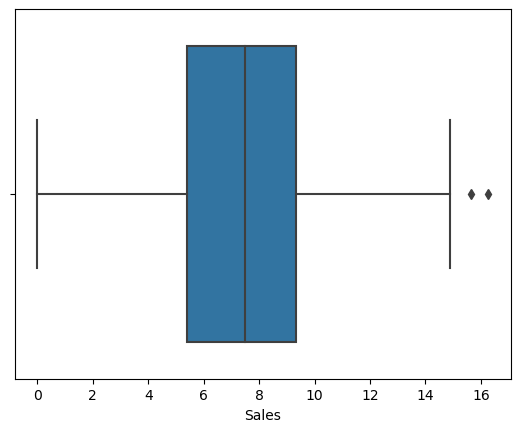

In [8]:
sns.boxplot(df['Sales'])

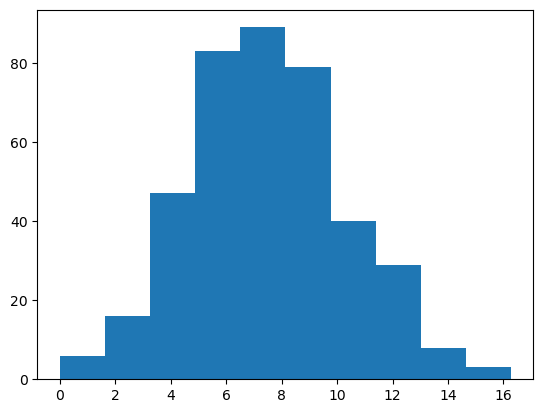

In [9]:
plt.hist('Sales', data=df)
plt.show()

Skewness:  0.18556036318721578
Kurtosis:  -0.08087736743346197


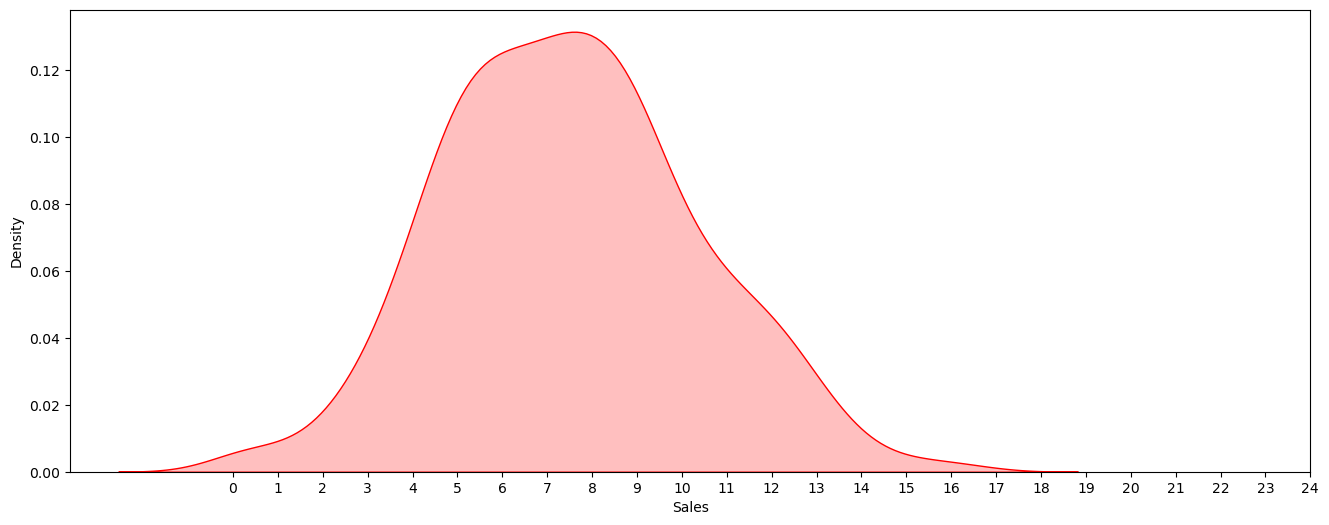

In [10]:
plt.figure(figsize=(16,6))
print("Skewness: ", df['Sales'].skew())
print("Kurtosis: ", df['Sales'].kurtosis())

graph = sns.kdeplot(df['Sales'], shade=True, color='red')
plt.xticks([i for i in range(0,25)])
plt.show()

In [11]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

Dividing sales into 3 categorical values, "Low", "Medium", "High" into new column as "sales_cat".

In [12]:
df1 = df.copy()
df1['sales_cat'] = pd.cut(x=df1['Sales'], bins=[0,5.39,7.4,20], labels=["low", 'medium', 'high'])
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US sales_cat  
0         17   Yes  Yes      high  
1         10   Yes  Yes      high  
2         12   Yes  Yes      high  
3         14   Yes  Yes    medium  
4         13   Yes   No       low

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  sales_cat    399 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [14]:
df1['sales_cat'].value_counts()

high      206
low        99
medium     94
Name: sales_cat, dtype: int64

Text(0.5, 1.0, 'Distribution of Sales')

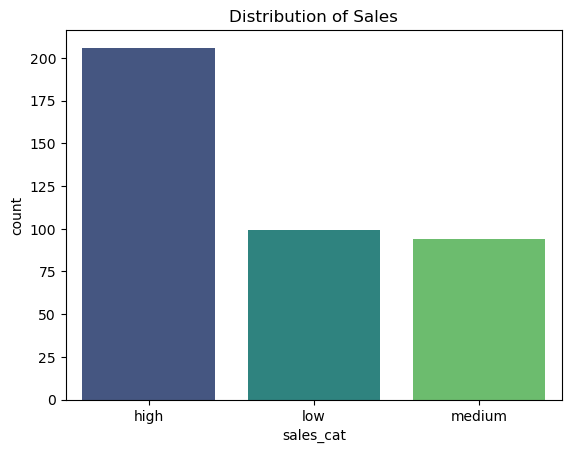

In [15]:
sns.countplot(x='sales_cat', data=df1, palette='viridis',
             order=df1['sales_cat'].value_counts().index)

plt.xticks(fontsize=10)
plt.title("Distribution of Sales")

In [16]:
cat_feature = df1.describe(include=['object','category']).columns
cat_feature

Index(['ShelveLoc', 'Urban', 'US', 'sales_cat'], dtype='object')

In [17]:
num_feature = df1.describe(include=['int64', 'float64']).columns
num_feature

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

Univariate Plotting (Analysing numerical features: )

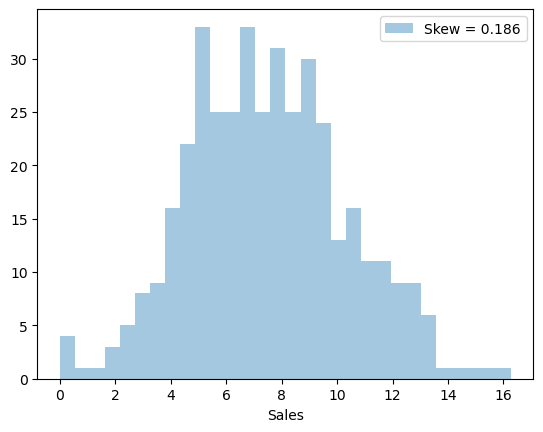

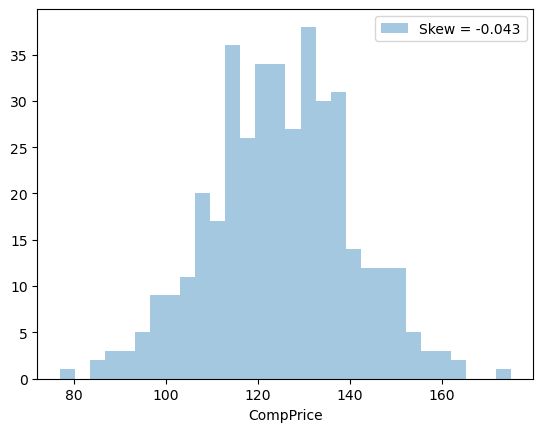

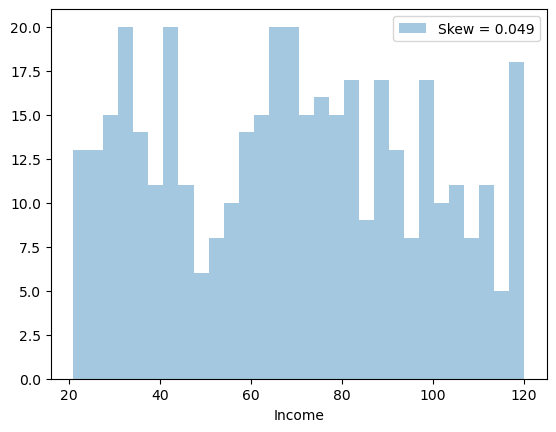

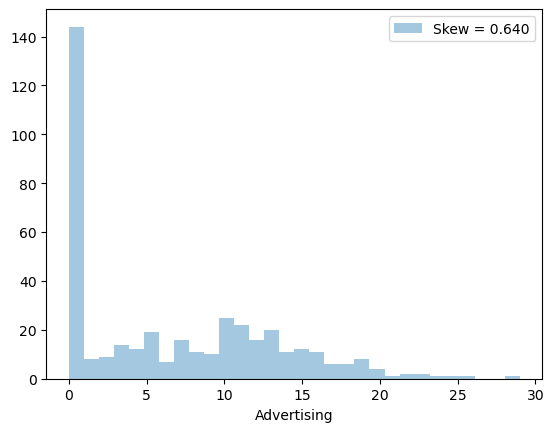

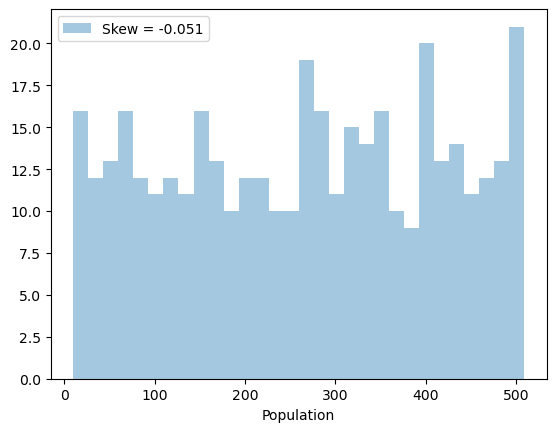

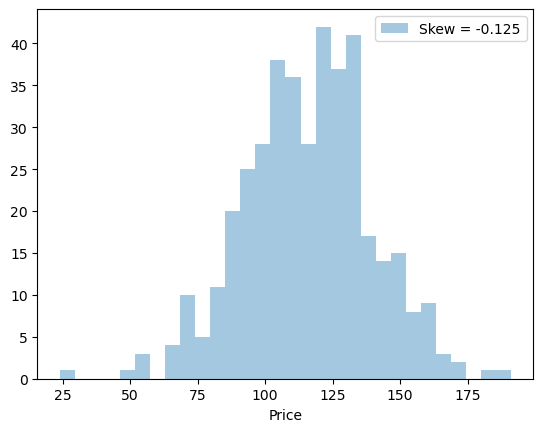

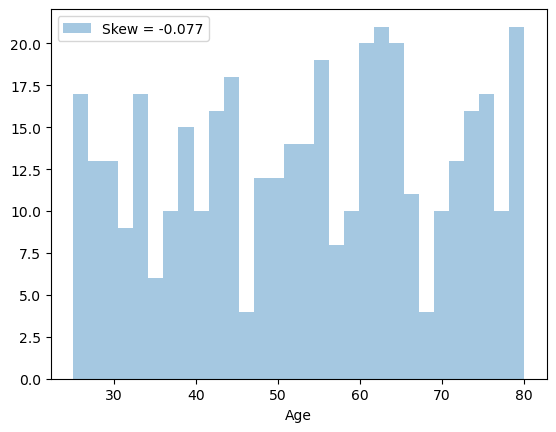

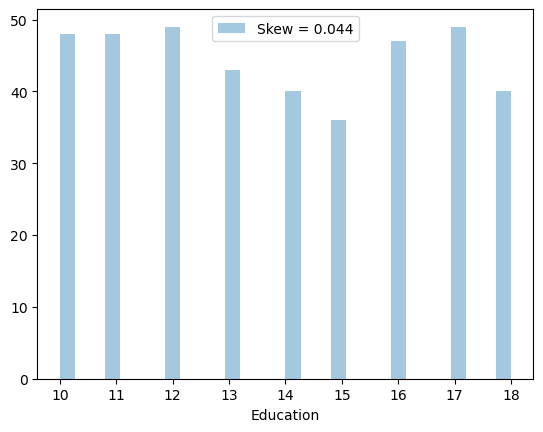

In [18]:
for i in num_feature:
    skew = df[i].skew()
    sns.distplot(df[i], kde=False, label='Skew = %.3f'%(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Outlier Detection: 

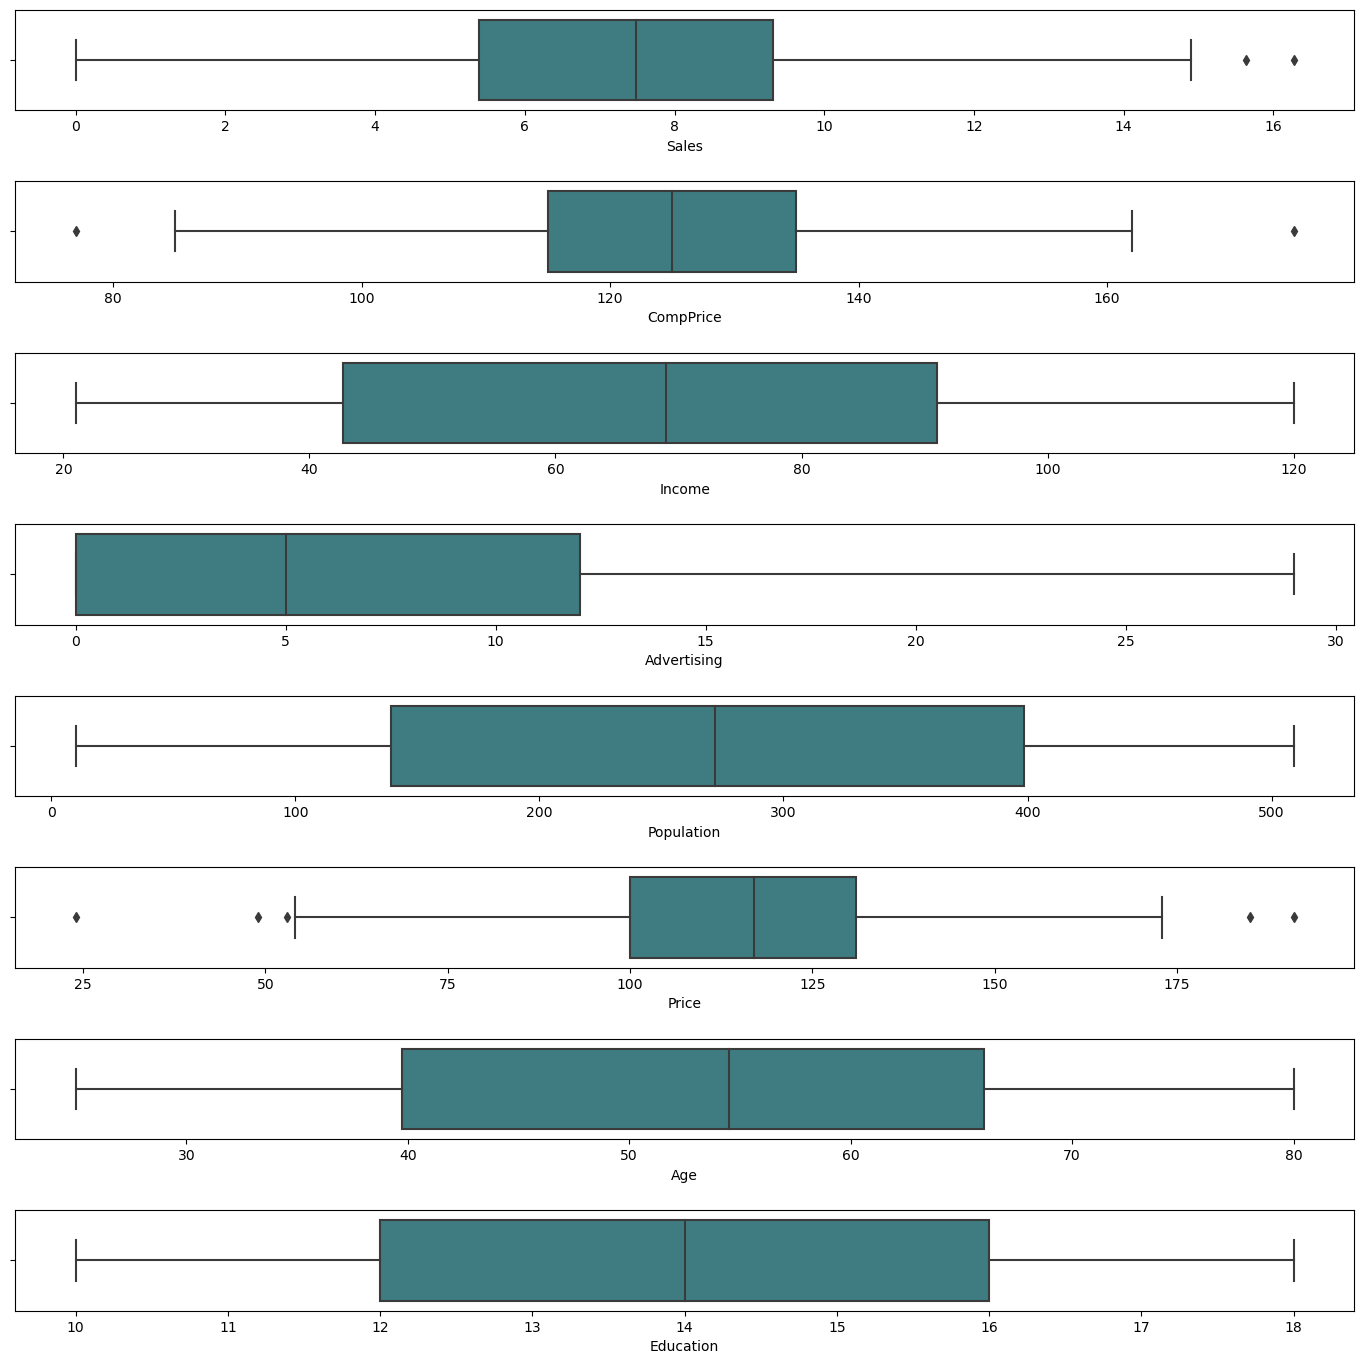

In [19]:
fig, axes=plt.subplots(8,1, figsize=(14,14), sharex=False, sharey=False)
sns.boxplot(x='Sales', data=df, palette='crest', ax=axes[0])
sns.boxplot(x='CompPrice', data=df, palette='crest', ax=axes[1])
sns.boxplot(x='Income', data=df, palette='crest', ax=axes[2])
sns.boxplot(x='Advertising', data=df, palette='crest', ax=axes[3])
sns.boxplot(x='Population', data=df, palette='crest', ax=axes[4])
sns.boxplot(x='Price', data=df, palette='crest', ax=axes[5])
sns.boxplot(x='Age', data=df, palette='crest', ax=axes[6])
sns.boxplot(x='Education', data=df, palette='crest', ax=axes[7])
plt.tight_layout(pad=2.0)



Multivariate Analysis: 

<Figure size 800x800 with 0 Axes>

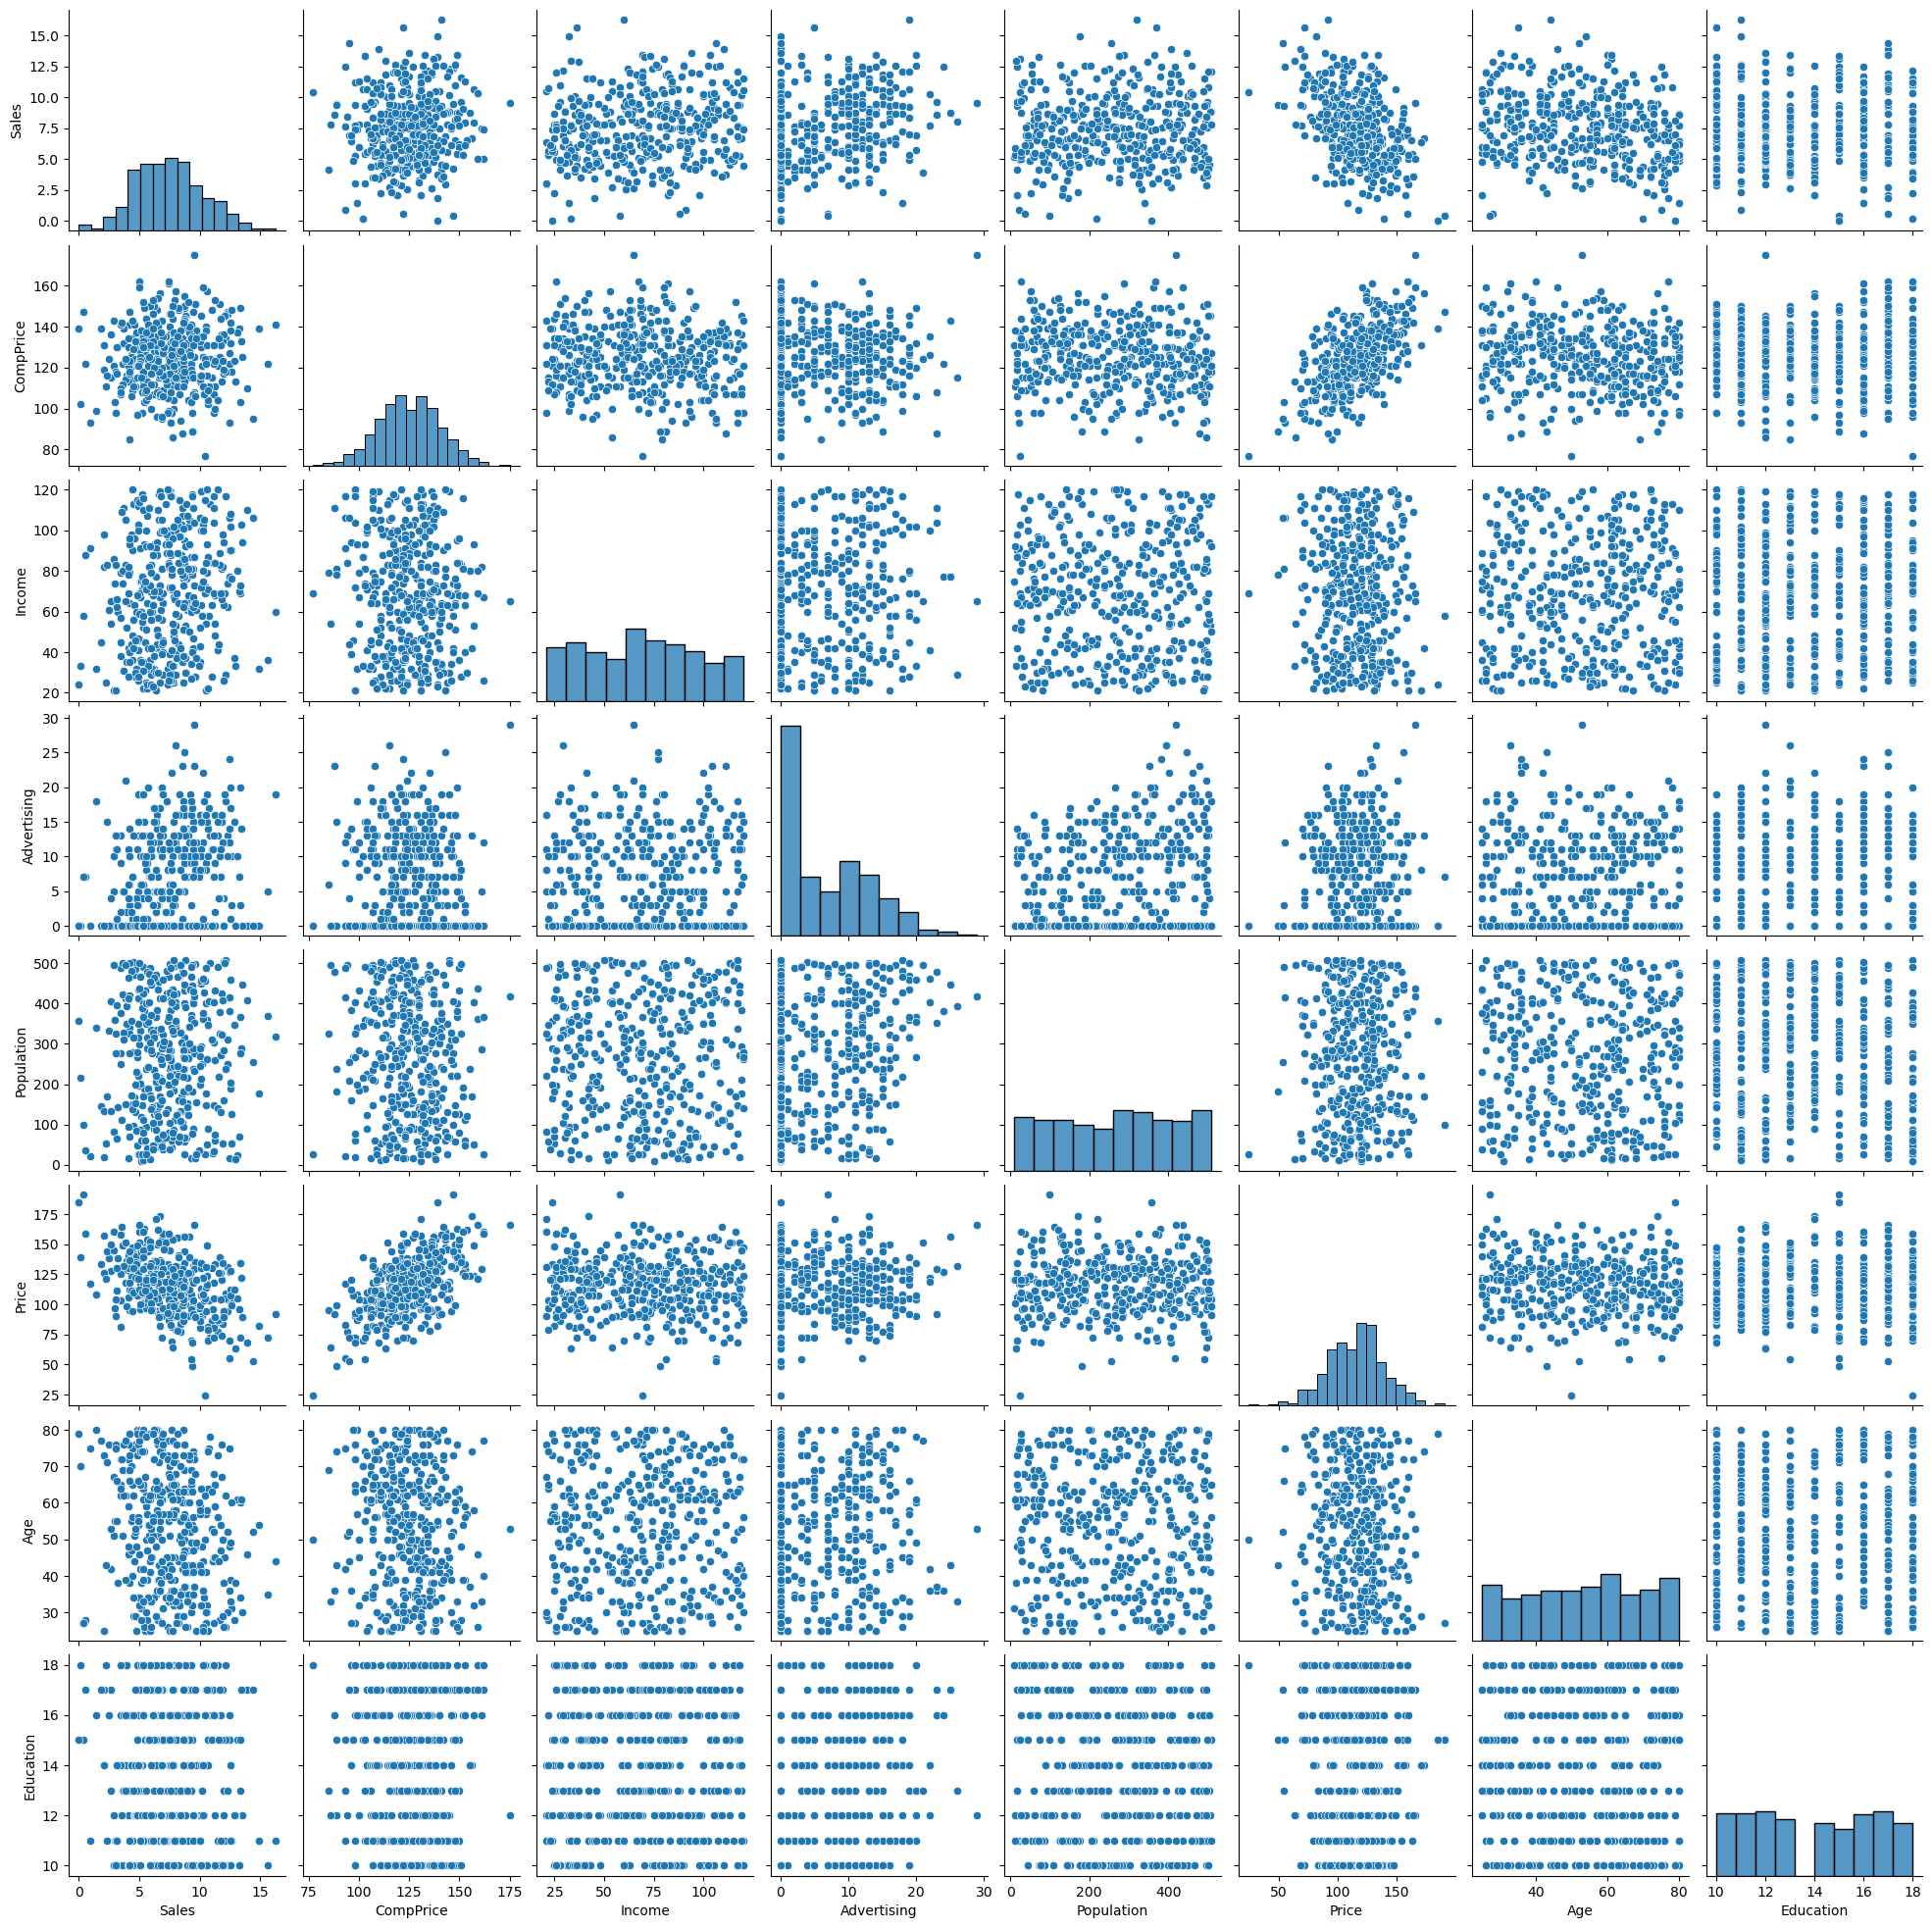

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

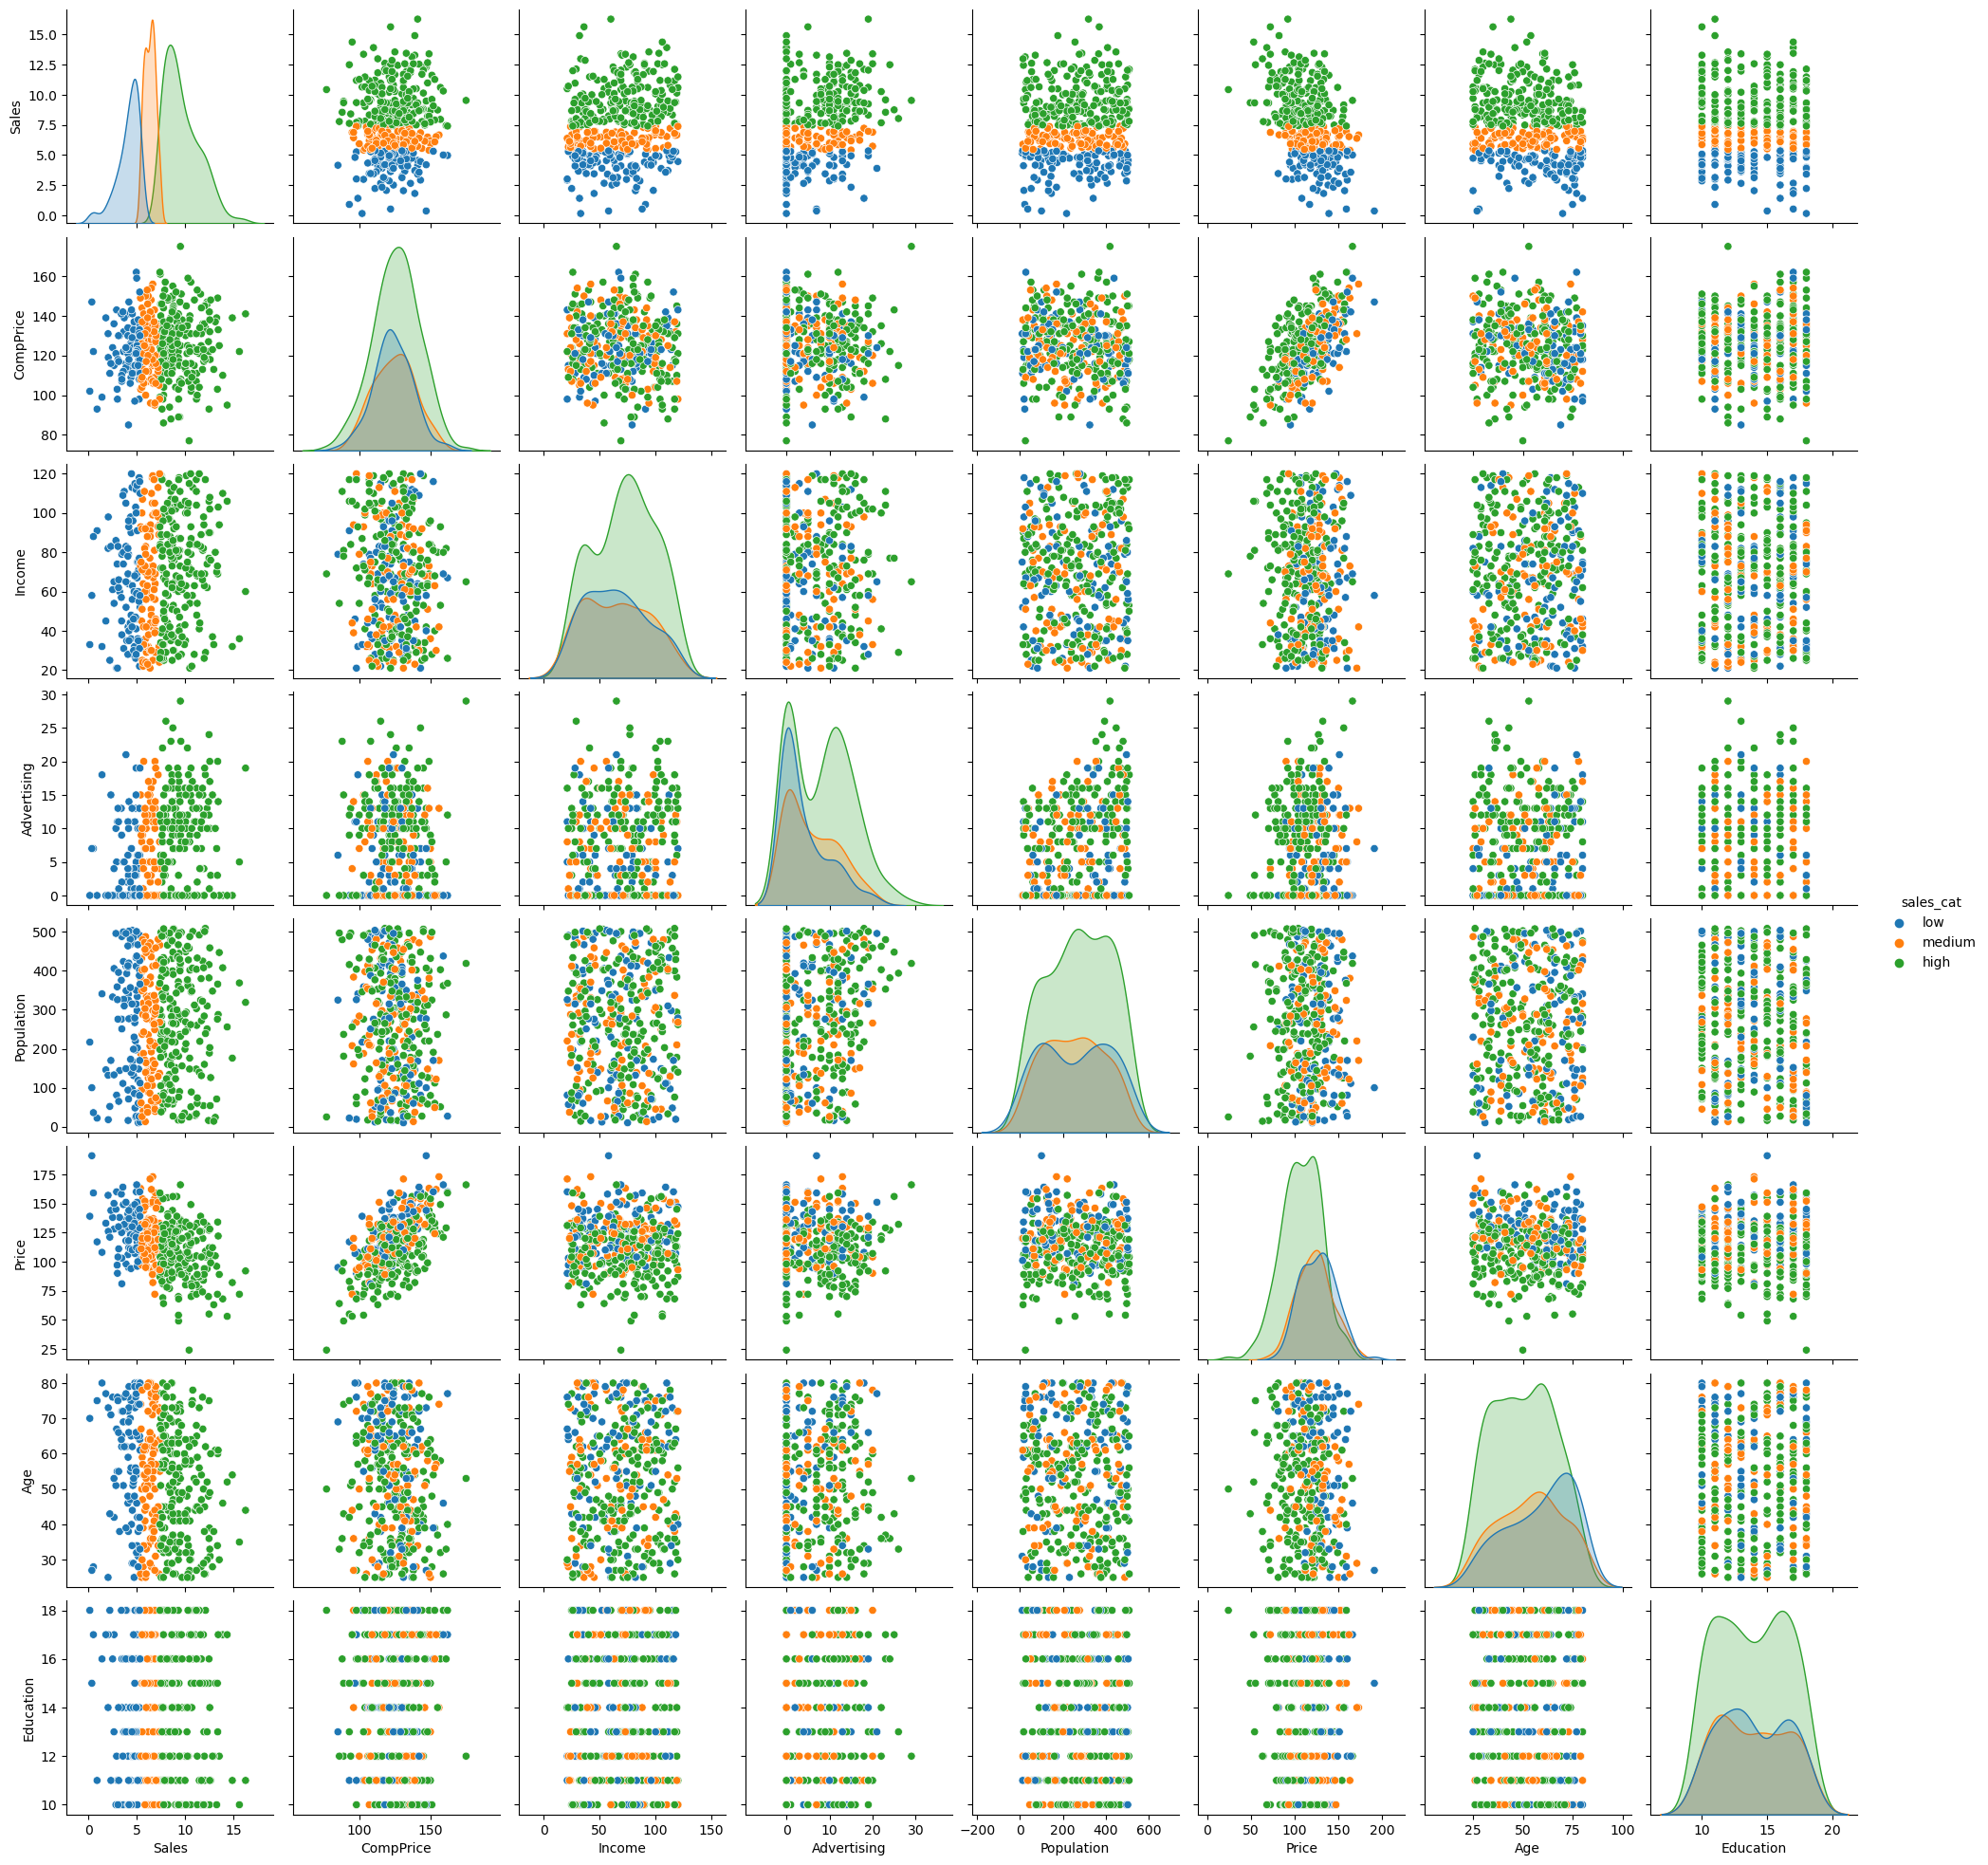

In [21]:
sns.pairplot(data=df1, hue='sales_cat')

Correlation between independent features and dependent feature

<AxesSubplot:>

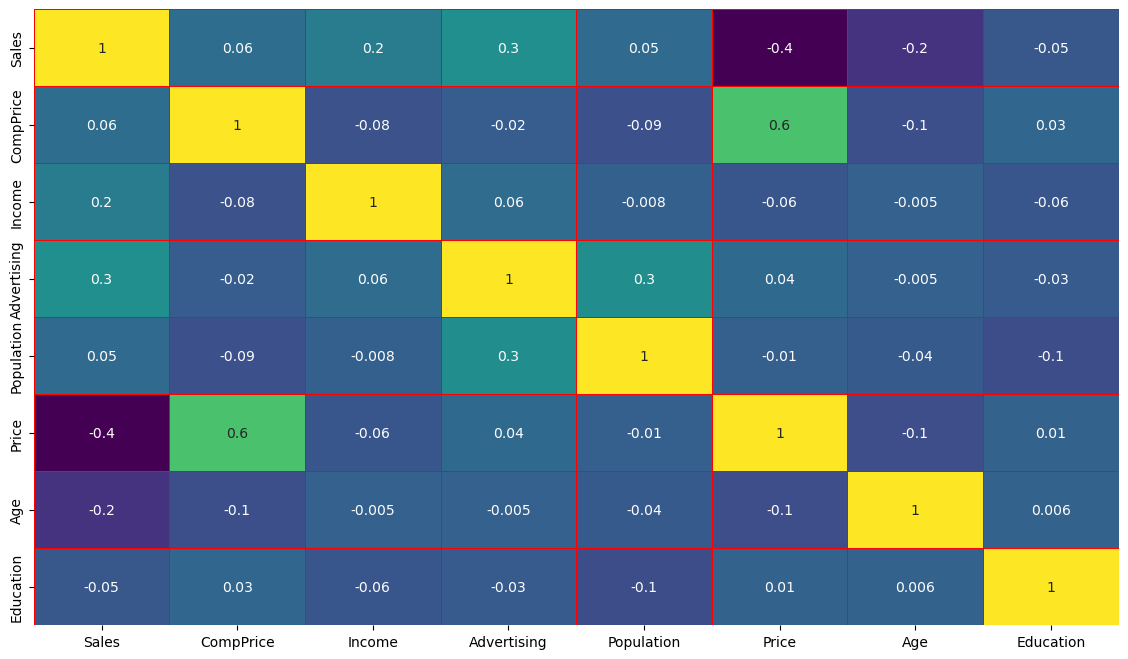

In [22]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='red')

In [23]:
data = df1.copy()
data.drop('Sales', axis=1, inplace=True)
data = pd.get_dummies(data.iloc[:,:-1])
data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

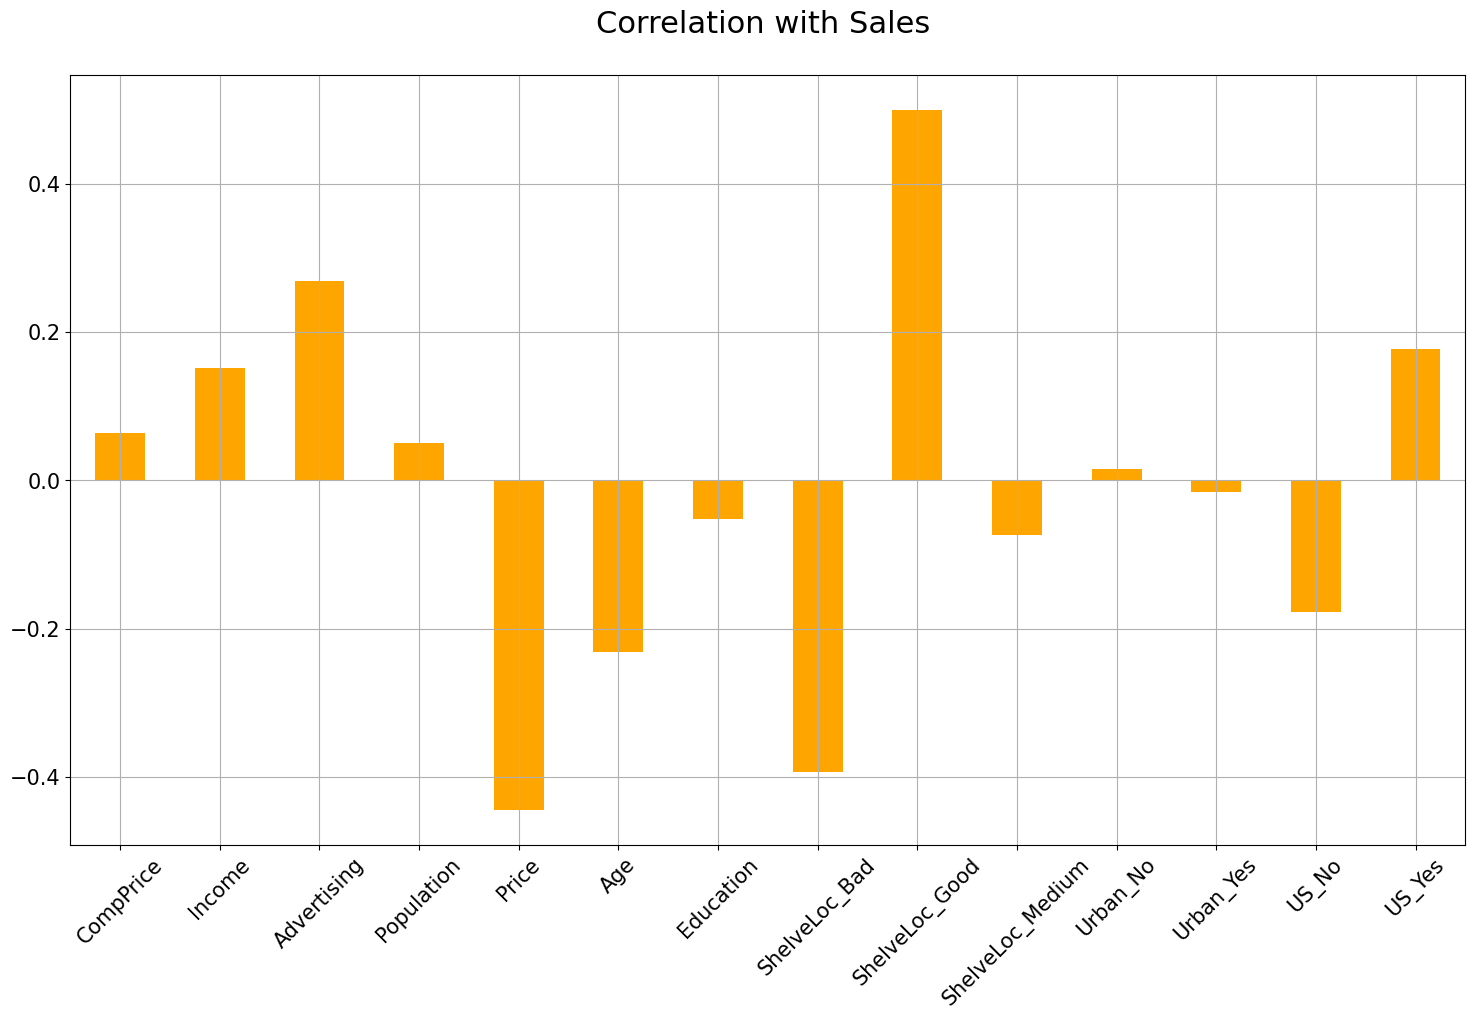

In [24]:
correlations = data.corrwith(df1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [25]:
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US sales_cat  
0         17   Yes  Yes      high  
1         10   Yes  Yes      high  
2         12   Yes  Yes      high  
3         14   Yes  Yes    medium  
4         13   Yes   No       low

<AxesSubplot:ylabel='None'>

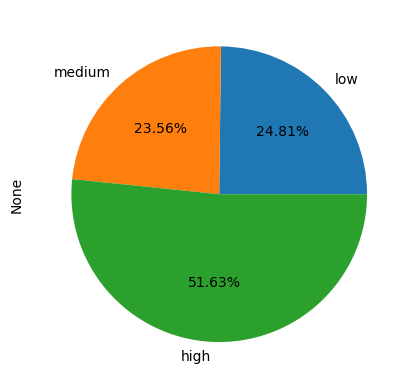

In [26]:
df1.groupby('sales_cat').size().plot(kind='pie', autopct='%.2f%%')

In [27]:
data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Feature Selection Technique: 

Data Preprocessing: 

In [99]:
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from collections import Counter
from sklearn.metrics import plot_confusion_matrix

In [29]:
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [30]:
data1 = df1.copy()
data1.drop('Sales', axis=1, inplace=True)
data1=pd.get_dummies(data1.iloc[:,:-1])
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [31]:
data1['sales'] = df1.sales_cat
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   sales  
0      0       1    high  
1      0       1    high  
2      0       1    high  
3      0       1  medium  
4      1       0     low

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
data1['sales'].replace(['low','medium','high'], [0,1,2], inplace=True)

In [34]:
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes sales  
0      0       1     2  
1      0       1     2  
2      0       1     2  
3      0       1     1  
4      1       0     0

In [35]:
data1.isnull().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
sales               1
dtype: int64

In [36]:
data1.dropna(inplace=True)

In [37]:
data1.isnull().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
sales               0
dtype: int64

In [38]:
x = data1.iloc[:,:-1]

y = data1.sales

In [39]:
x

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[399 rows x 14 columns]

In [40]:
y

0      2
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    2
398    1
399    2
Name: sales, Length: 399, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [41]:
#Feature importance

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [42]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)

In [43]:
scores = fit.scores_

features = fit.transform(x)

In [44]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
                       columns = ['score', 'features'])

score_df.sort_values(by='score', ascending=False, inplace=True)
score_df

score          features
4   274.517509             Price
2   168.525291       Advertising
3   142.810342        Population
5    89.887369               Age
1    73.079068            Income
7    46.091952     ShelveLoc_Bad
8    41.615214    ShelveLoc_Good
12    5.349543             US_No
9     5.335149  ShelveLoc_Medium
0     3.284345         CompPrice
13    2.923587            US_Yes
10    0.236675          Urban_No
11    0.098195         Urban_Yes
6     0.037861         Education

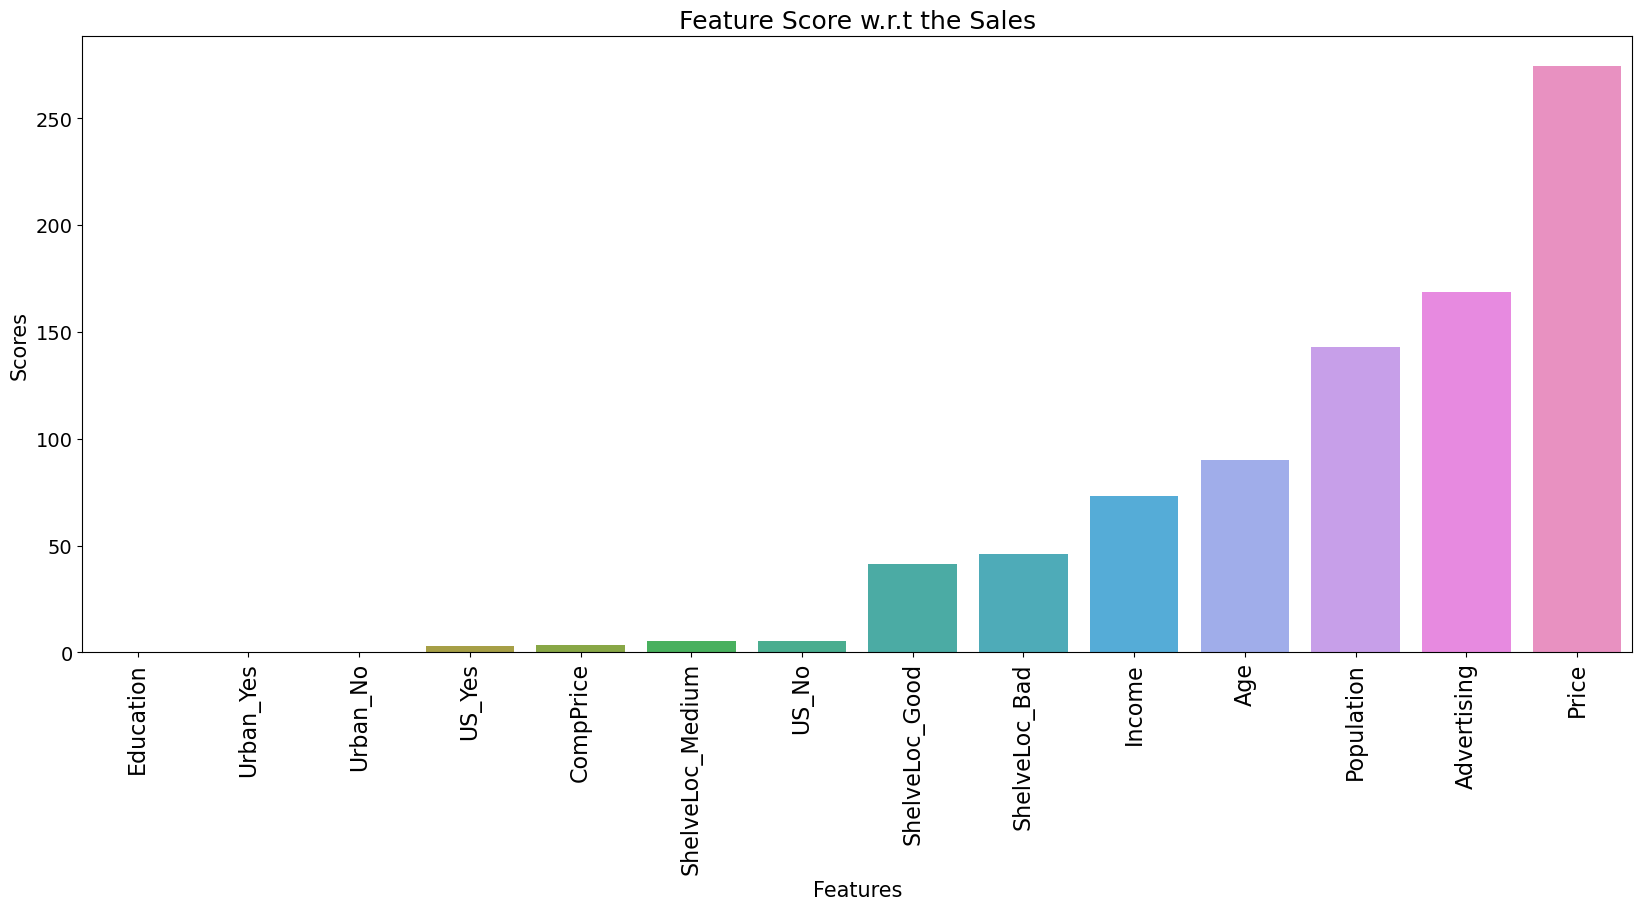

In [45]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='features',
            y="score", 
            data=score_df, 
            order=score_df.sort_values('score').features)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()


In [46]:
data1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

In [47]:
model_data = data1[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium sales  
0                 0     2  
1                 0     2  
2                 1     2  
3                 1     1  
4                 0     0

Random Forest Built-in Feature Importance: 

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

classifier_rf.fit(x, y)

print('checking the oob score',classifier_rf.oob_score_)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

checking the oob score 0.6416040100250626
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.6842171717171717
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)


Feature Importance: 

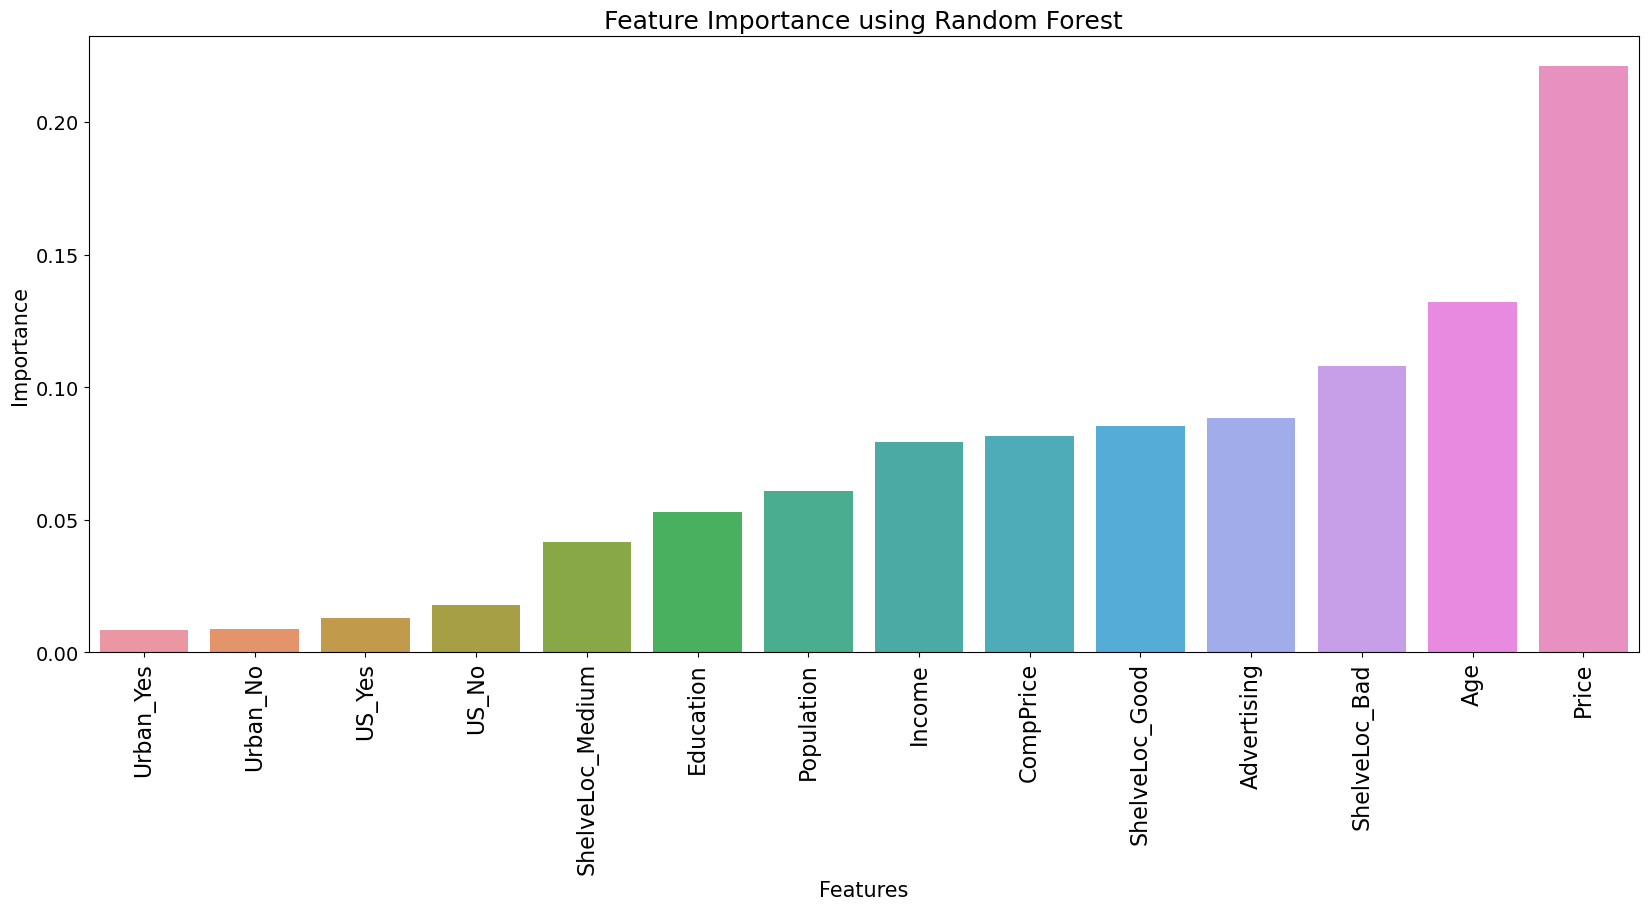

In [50]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rf_best.feature_importances_
})

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Importance", 
            data=imp_df, 
            order=imp_df.sort_values('Importance').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Importance using Random Forest", size=18)
plt.show()

Model Developement: 

In [51]:
x = model_data.drop('sales', axis=1)
y = model_data['sales']

In [52]:
y.unique()

[2, 1, 0]
Categories (3, int64): [0 < 1 < 2]

In [53]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_ix, test_ix in skf.split(x,y):
    train_X, test_X = x.iloc[train_ix], x.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    
counter_train = Counter(train_y)
counter_test = Counter(test_y)

print("Training Data: ", counter_train)
print("Testing Data: ", counter_train)

Training Data:  Counter({2: 186, 0: 90, 1: 84})
Testing Data:  Counter({2: 186, 0: 90, 1: 84})


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)


In [55]:
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print("Training data: ", counter_train)
print("Testing Data: ", counter_test)

Training data:  Counter({2: 144, 0: 69, 1: 66})
Testing Data:  Counter({2: 62, 0: 30, 1: 28})


In [56]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (279, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (279,)
Shape of y_test (120,)


Grid Search using Stratified KFold Splits on imbalances DataSet

In [57]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    90.0  84.0  186.0       1.0      360.0         360.0
_______________________________________________
Confusion Matrix: 
 [[ 90   0   0]
 [  0  84   0]
 [  0   0 186]]

Test Result:
Accuracy Score: 64.10%
_______________________________________________
CLASSIFICATION REPORT:
                  0          1          2  accuracy  macro avg  weighted avg
precision  0.555556   0.500000   0.678571  0.641026   0.578042      0.604396
recall     0.555556   0.100000   0.950000  0.641026   0.535185      0.641026
f1-score   0.555556   0.166667   0.791667  0.641026   0.504630      0.576923
support    9.000000  10.000000  20.000000

Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    69.0  66.0  144.0       1.0      279.0         279.0
_______________________________________________
Confusion Matrix: 
 [[ 69   0   0]
 [  0  66   0]
 [  0   0 144]]

Test Result:
Accuracy Score: 65.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.578947   0.411765   0.769231  0.658333    0.586648      0.638251
recall      0.733333   0.250000   0.806452  0.658333    0.596595      0.658333
f1-score    0.647059   0.311111   0.787402  0.658333    0.581857      0.641181
support    30.000000  28.000000  

In both the cases, we had imbalanced dataset and our results are getting biased towards the majority.
The model is correctly classifying all the majority classes but yet fails to classify the minority classes.<br>
SO we need to use some more kind of oversampling techniques to balance the dataset.

Handling imbalanced data uing SMOTE based techniques: 

In [60]:
x 

Price  Advertising  Population  Income  Age  ShelveLoc_Good  \
0      120           11         276      73   42               0   
1       83           16         260      48   65               1   
2       80           10         269      35   59               0   
3       97            4         466     100   55               0   
4      128            3         340      64   38               0   
..     ...          ...         ...     ...  ...             ...   
395    128           17         203     108   33               1   
396    120            3          37      23   55               0   
397    159           12         368      26   40               0   
398     95            7         284      79   50               0   
399    120            0          27      37   49               1   

     ShelveLoc_Bad  ShelveLoc_Medium  
0                1                 0  
1                0                 0  
2                0                 1  
3                0                 1  
4                1                 0  
..             ...               ...  
395              0                 0  
396              0                 1  
397              0                 1  
398              1                 0  
399              0                 0  

[399 rows x 8 columns]

In [61]:
y

0      2
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    2
398    1
399    2
Name: sales, Length: 399, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [62]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)


SMOTE Oversmpling technique: 

In [63]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 144, 0: 69, 1: 66})
After Counter({0: 144, 2: 144, 1: 144})


ADASYN: Adaptive Synthetic Sampling: 

In [64]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 144, 0: 69, 1: 66})
After Counter({1: 148, 0: 147, 2: 144})


SMOTE + Tomek Links: 

In [65]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 144, 0: 69, 1: 66})
After Counter({0: 132, 1: 128, 2: 120})


SMOTE + ENN

In [66]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 144, 0: 69, 1: 66})
After Counter({1: 65, 0: 61, 2: 28})


Performance Analysis of each Resampling: 

In [67]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [100]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    plot_confusion_matrix(clf_model, X_test, y_test)  
    plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('*******************************')
    print('Classification Report')
    print(classification_report(y_test,y_pred),"\n")
    print('*******************************')
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [101]:
model_params = {
    'decision_tree' :{
        'model' :  RandomForestClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [102]:
from sklearn.metrics import plot_confusion_matrix

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix


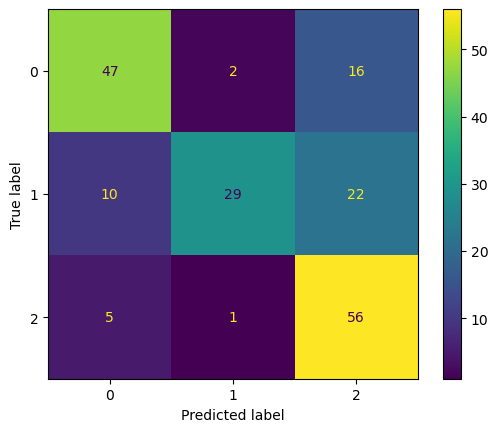

[[47  2 16]
 [10 29 22]
 [ 5  1 56]] 

*******************************
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        65
           1       0.91      0.48      0.62        61
           2       0.60      0.90      0.72        62

    accuracy                           0.70       188
   macro avg       0.75      0.70      0.69       188
weighted avg       0.75      0.70      0.70       188
 

*******************************
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix


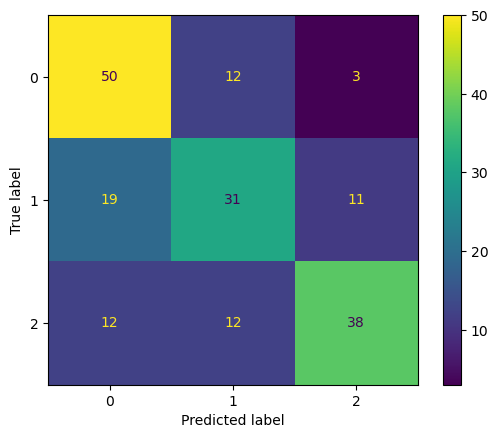

[[50 12  3]
 [19 31 11]
 [12 12 38]] 

*******************************
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.77      0.68        65
           1       0.56      0.51      0.53        61
           2       0.73      0.61      0.67        62

    accuracy                           0.63       188
   macro avg       0.64      0.63      0.63       188
weighted avg       0.64      0.63      0.63       188
 

*******************************
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ADASYN
Confusion Matrix


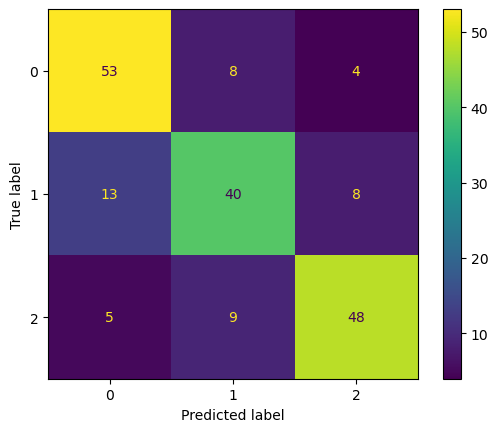

[[53  8  4]
 [13 40  8]
 [ 5  9 48]] 

*******************************
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        65
           1       0.70      0.66      0.68        61
           2       0.80      0.77      0.79        62

    accuracy                           0.75       188
   macro avg       0.75      0.75      0.75       188
weighted avg       0.75      0.75      0.75       188
 

*******************************
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE_TOMEK
Confusion Matrix


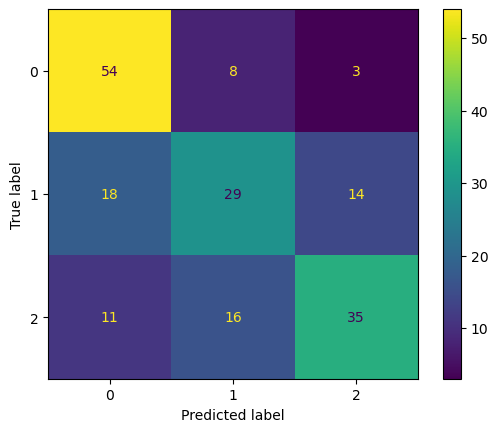

[[54  8  3]
 [18 29 14]
 [11 16 35]] 

*******************************
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        65
           1       0.55      0.48      0.51        61
           2       0.67      0.56      0.61        62

    accuracy                           0.63       188
   macro avg       0.62      0.62      0.62       188
weighted avg       0.62      0.63      0.62       188
 

*******************************
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE_ENN
Confusion Matrix


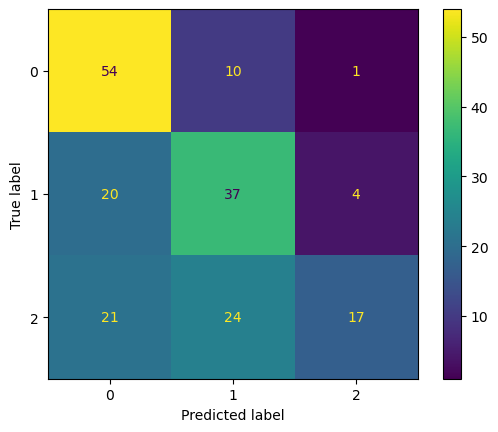

[[54 10  1]
 [20 37  4]
 [21 24 17]] 

*******************************
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.83      0.68        65
           1       0.52      0.61      0.56        61
           2       0.77      0.27      0.40        62

    accuracy                           0.57       188
   macro avg       0.62      0.57      0.55       188
weighted avg       0.62      0.57      0.55       188
 

*******************************


In [103]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

After comapring the result, ADASYN technique is giving the best result.

In [71]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = ADASYN(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 206, 0: 99, 1: 94})
After Counter({0: 216, 2: 206, 1: 204})


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 216, 2: 206, 1: 204})
After Counter({0: 151, 2: 144, 1: 143})
Shape of X_train:  (438, 8)
Shape of X_test:  (188, 8)
Shape of y_train:  (438,)
Shape of y_test (188,)


In [73]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7374429223744292

In [74]:
pred_train = model.predict(x_train)

In [75]:
accuracy_score(y_train,pred_train)

1.0

In [76]:
confusion_matrix(y_train,pred_train)

array([[151,   0,   0],
       [  0, 143,   0],
       [  0,   0, 144]], dtype=int64)

In [77]:
pred_test = model.predict(x_test)

In [78]:
accuracy_score(y_test,pred_test)

0.7127659574468085

In [79]:
confusion_matrix(y_test,pred_test)

array([[54,  8,  3],
       [10, 42,  9],
       [ 7, 17, 38]], dtype=int64)

In [80]:
predicted =pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [81]:
predicted

Actual  Predicted
123      2          2
473      0          1
31       2          1
587      1          1
448      0          0
..     ...        ...
145      2          1
374      2          0
3        1          1
198      1          1
588      1          1

[188 rows x 2 columns]

Random Forest Hypermarameter Tuning: 

In [82]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [83]:
loc = np.array(score_array).max()
score_array.index(loc)+1

131

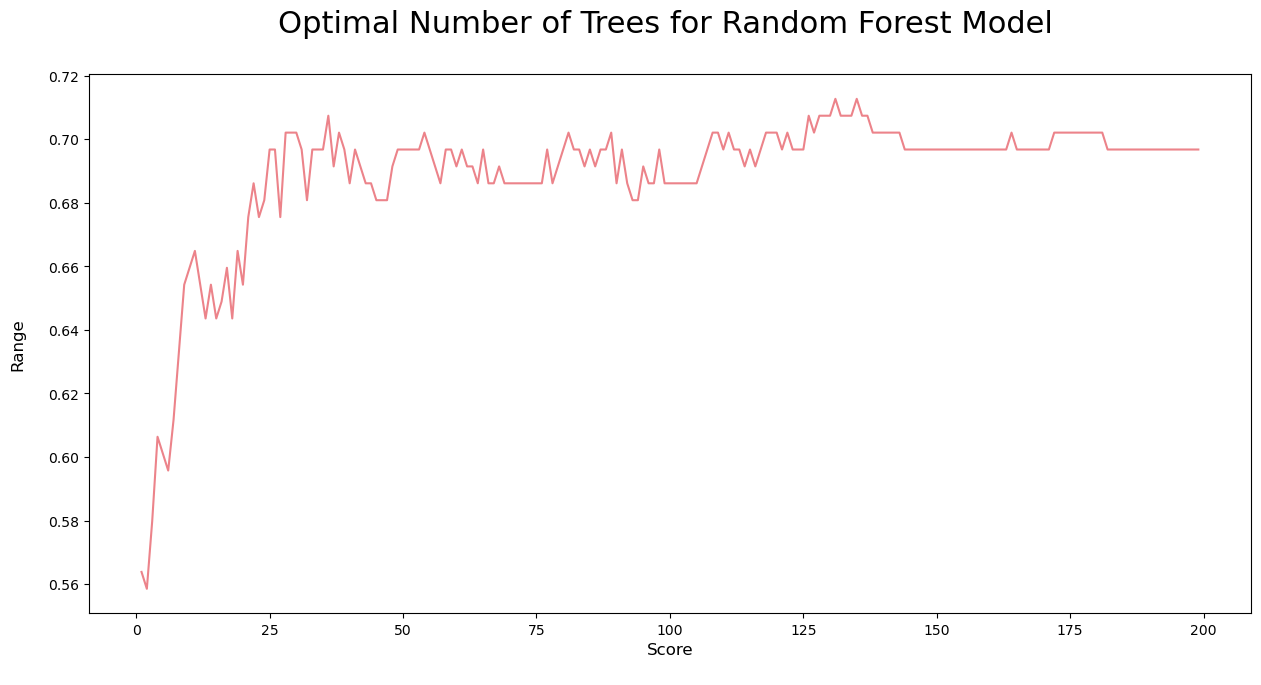

In [84]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Random Forest Search Cross Validation: 

In [85]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 91.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.911950    0.891304    0.936170  0.913242    0.913141   
recall       0.960265    0.860140    0.916667  0.913242    0.912357   
f1-score     0.935484    0.875445    0.926316  0.913242    0.912415   
support    151.000000  143.000000  144.000000  0.913242  438.000000   

           weighted avg  
precision      0.913172  
recall         0.913242  
f1-score       0.912868  
support      438.000000  
_______________________________________________
Confusion Matrix: 
 [[145   5   1]
 [ 12 123   8]
 [  2  10 132]]

Test Result:
Accuracy Score: 67.55%
______________________________________________

Visualizing one of the Decision Tree in Random Forest

In [86]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=195,
                       random_state=42)

In [87]:
df1.sales_cat.unique()

['high', 'medium', 'low', NaN]
Categories (3, object): ['low' < 'medium' < 'high']

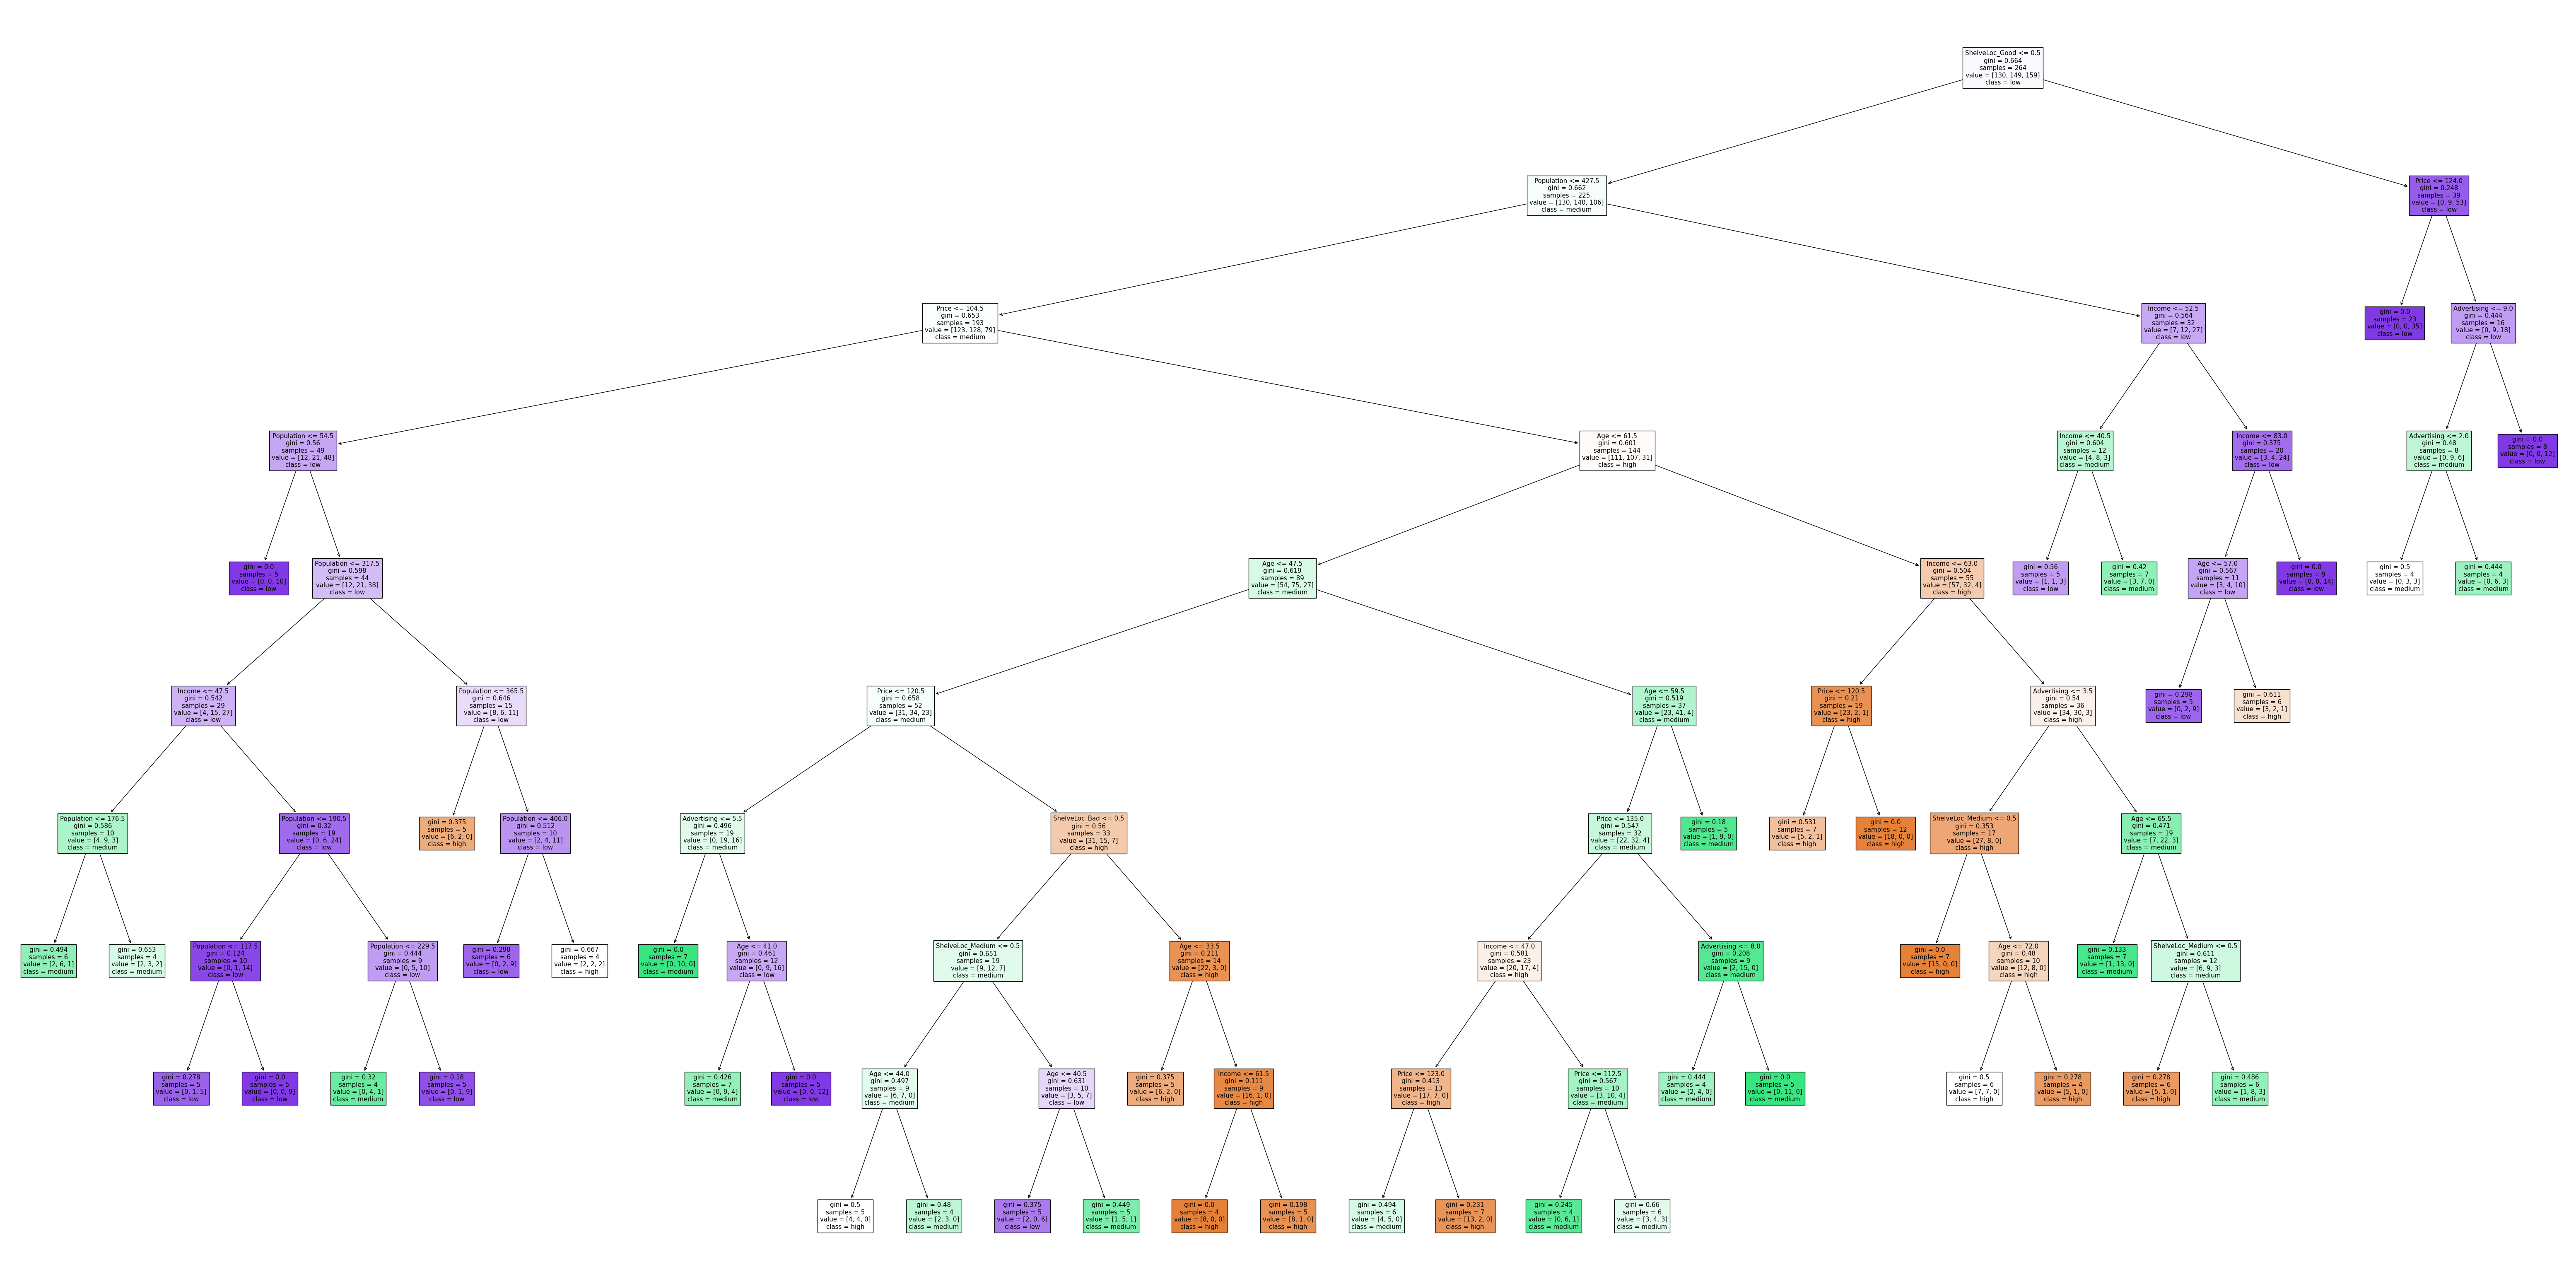

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,class_names=df1.sales_cat.unique(),filled=True)
plt.show()